In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.core.interchange.dataframe_protocol import DataFrame

In [26]:
df_train = pd.read_csv('Cleaned_train.csv', index_col=["ID"])
df_test = pd.read_csv('Cleaned_test.csv', index_col=["ID"])
test_id = df_test.index
common_cols = list(set(df_train.columns) & set(df_test.columns))
df_train = df_train[common_cols]
df_test = df_test[common_cols]

In [27]:
dtype_dict = {
    # Category columns
    "Naped": "category",
    "Skrzynia_biegow": "category",
    "Typ_nadwozia": "category",
    "Kolor": "category",
    "Kraj_pochodzenia": "category",

    # String columns
    "Marka_pojazdu": "category",
    "Model_pojazdu": "string",
    # "Wersja_pojazdu": "string",
    # "Nazwa_generacji": "string",
    "Typ_silnika": "category",

    # Float columns
    "Rok_produkcji": "float64",
    "Przebieg_km": "float64",
    "Moc_KM": "float64",
    "Pojemnosc_cm3": "float64",
    "Emisja_CO2": "float64",
    "Liczba_drzwi": "float64",
    "Rok_startu_produkcji": "float64",
    "Rok_konca_produkcji": "float64",
    'Wspolczynnik_Rok_produkcji': "float64",
    'Wspolczynnik_Przebieg_km': "float64",
    'Wspolczynnik_Moc_KM': "float64",
    'Wspolczynnik_Pojemnosc_cm3': "float64",
    'Wspolczynnik_Liczba_drzwi': "float64",
    'Wspolczynnik_Automatic': "float64",
    'Wspolczynnik_Manual': "float64",
    'Wspolczynnik_SUV': "float64",
    'Wspolczynnik_sedan': "float64",
    'Wspolczynnik_station_wagon': "float64",

    # Integer columns
    "Rok_publikacji_oferty": "float",
    "Miesiac_publikacji_oferty": "float",

    # Boolean columns
    "Xenon lights": "bool",
    "Factory radio": "bool",
    "Velor upholstery": "bool",
    "DVD player": "bool",
    "Start-Stop system": "bool",
    "Electrically adjustable seats": "bool",
    "Fog lights": "bool",
    "Shift paddles": "bool",
    "Passengers airbag": "bool",
    "Daytime running lights": "bool",
    "Power steering": "bool",
    "Four-zone air conditioning": "bool",
    "Sunroof": "bool",
    "GPS navigation": "bool",
    "Manual air conditioning": "bool",
    "Heated side mirrors": "bool",
    "Parking assistant": "bool",
    "ESP(stabilization of the track)": "bool",
    "Immobilizer": "bool",
    "Leather upholstery": "bool",
    "Lane assistant": "bool",
    "Drivers airbag": "bool",
    "USB socket": "bool",
    "Electric front windows": "bool",
    "Blind spot sensor": "bool",
    "SD socket": "bool",
    "Speed limiter": "bool",
    "Electrochromic side mirrors": "bool",
    "LED lights": "bool",
    "AUX socket": "bool",
    "Auxiliary heating": "bool",
    "Heated front seats": "bool",
    "Rain sensor": "bool",
    "Rear parking sensors": "bool",
    "Twilight sensor": "bool",
    "Front side airbags": "bool",
    "Automatic air conditioning": "bool",
    "Roof rails": "bool",
    "Central locking": "bool",
    "ABS": "bool",
    "CD": "bool",
    "Bluetooth": "bool",
    "Dual zone air conditioning": "bool",
    "Alloy wheels": "bool",
    "Cruise control": "bool",
    "Airbag protecting the knees": "bool",
    "TV tuner": "bool",
    "Rear side airbags": "bool",
    "Multifunction steering wheel": "bool",
    "Air curtains": "bool",
    "On-board computer": "bool",
    "Active cruise control": "bool",
    "CD changer": "bool",
    "Electrochromic rear view mirror": "bool",
    "Tinted windows": "bool",
    "Adjustable suspension": "bool",
    "Rear view camera": "bool",
    "MP3": "bool",
    "Heated rear seats": "bool",
    "Electric rear windows": "bool",
    "Alarm": "bool",
    "Hook": "bool",
    "Heated windscreen": "bool",
    "Isofix": "bool",
    "Front parking sensors": "bool",
    "Panoramic roof": "bool",
    "Aftermarket radio": "bool",
    "HUD(head-up display)": "bool",
    "Electrically adjustable mirrors": "bool",
    "ASR (traction control)": "bool",
    'Marka_pojazdu_encoded': "float",
     'Marka_Audi': "float",
     'Marka_BMW': "float",
     'Marka_Citroën': "float",
     'Marka_Fiat': "float",
     'Marka_Ford': "float",
     'Marka_Honda': "float",
     'Marka_Hyundai': "float",
     'Marka_Jeep': "float",
     'Marka_Mazda': "float",
     'Marka_Mercedes-Benz': "float",
     'Marka_Mitsubishi': "float",
     'Marka_Nissan': "float",
     'Marka_Opel': "float",
     'Marka_Peugeot': "float",
     'Marka_Renault': "float",
     'Marka_Seat': "float",
     'Marka_Suzuki': "float",
     'Marka_Toyota': "float",
     'Marka_Volkswagen': "float",
     'Marka_Volvo': "float",
     'Marka_Škoda': "float",

    # Object columns (to be handled separately)
    "Pierwszy_wlasciciel": "category",  # Leave as object or map to category if needed
    "Cena": "float",  # Leave as object or convert to float after cleaning
    "Rok_pierwszej_rejestracji": "float",  # Leave as object or convert to datetime
    "Miesiac_pierwszej_rejestracji": "float",  # Leave as object or convert to datetime
    "Wojewodztwo": "category",  # Leave as object or map to category
    # "Miejscowosc": "object",  # Leave as object or map to category
}
ls = list(set(list(dtype_dict.keys())) & set(common_cols))
new_dtype_dict = {}
for element in ls:
    new_dtype_dict[element] = dtype_dict[element]

df_train = df_train[ls].astype(new_dtype_dict)
df_test = df_test[ls].astype(new_dtype_dict)

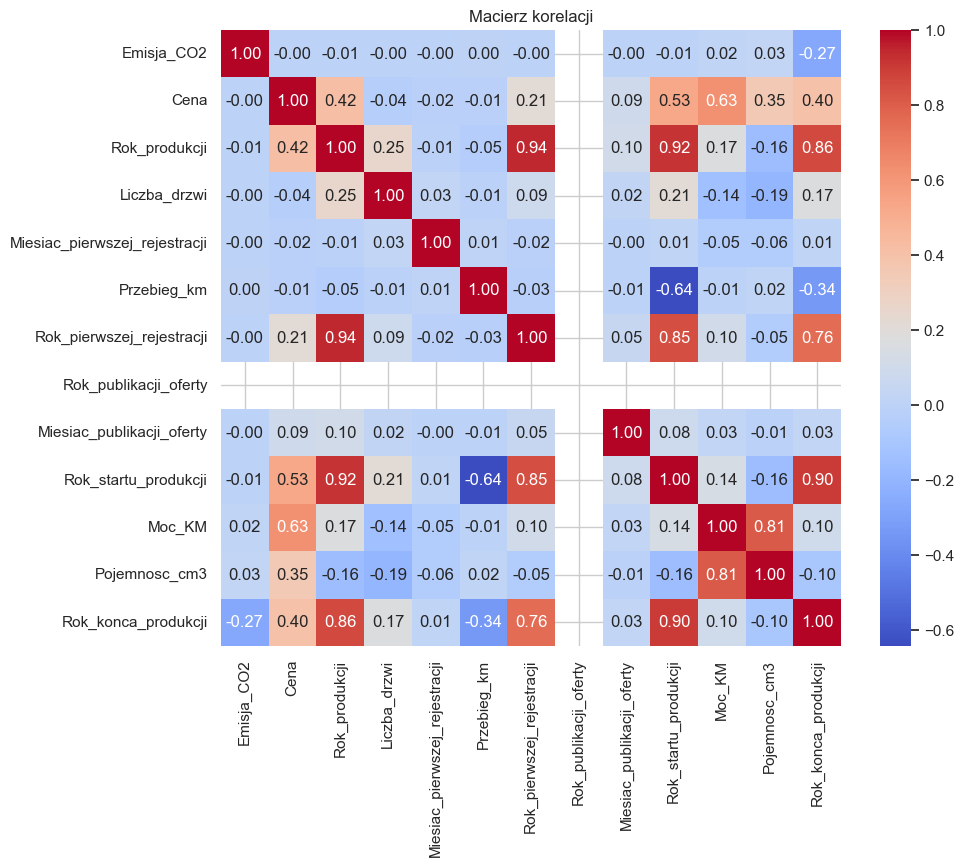

Cena                             1.000000
Moc_KM                           0.625016
Rok_startu_produkcji             0.528036
Rok_produkcji                    0.418155
Rok_konca_produkcji              0.402876
Pojemnosc_cm3                    0.352933
Rok_pierwszej_rejestracji        0.213216
Miesiac_publikacji_oferty        0.091959
Emisja_CO2                      -0.001028
Przebieg_km                     -0.014771
Miesiac_pierwszej_rejestracji   -0.018538
Liczba_drzwi                    -0.037216
Rok_publikacji_oferty                 NaN
Name: Cena, dtype: float64


In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Konwersja kolumny "Cena" na typ numeryczny, usuwając niepotrzebne znaki (np. spacje, złotówki)



# Wybór tylko kolumn numerycznych do obliczenia korelacji
numeric_columns = df_train.select_dtypes(include=[np.number]).columns

# Obliczenie macierzy korelacji
correlation_matrix = df_train[numeric_columns].corr()

# Wyświetlenie macierzy korelacji dla kolumny "Cena"
cena_correlation = correlation_matrix['Cena'].sort_values(ascending=False)

# Wizualizacja macierzy korelacji
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Macierz korelacji')
plt.show()

# Wyświetlenie korelacji z kolumną "Cena"
print(cena_correlation)

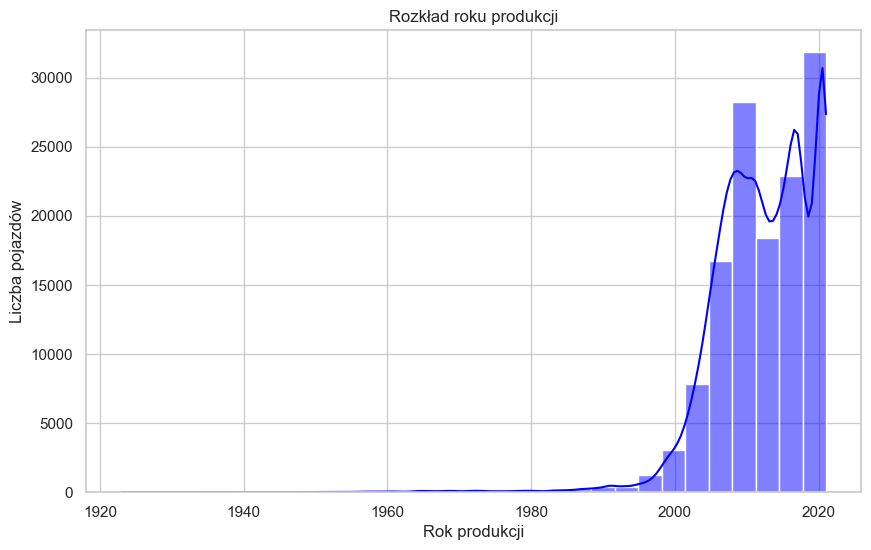

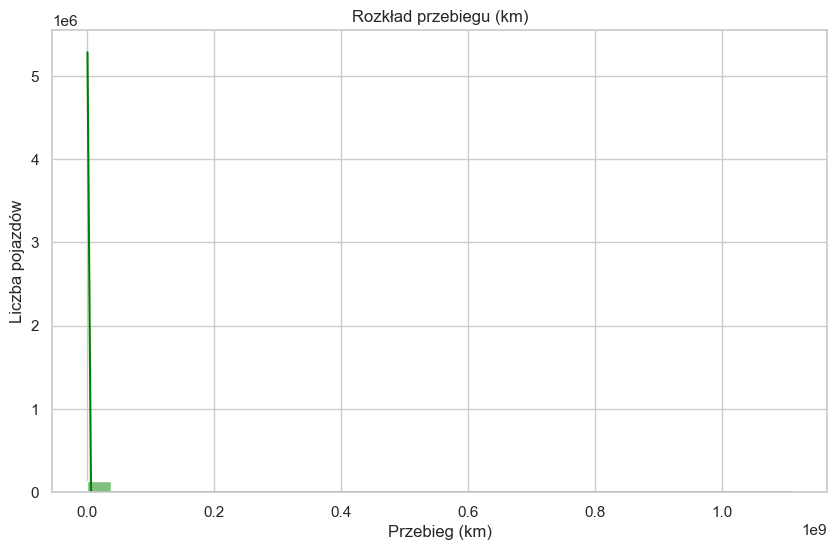

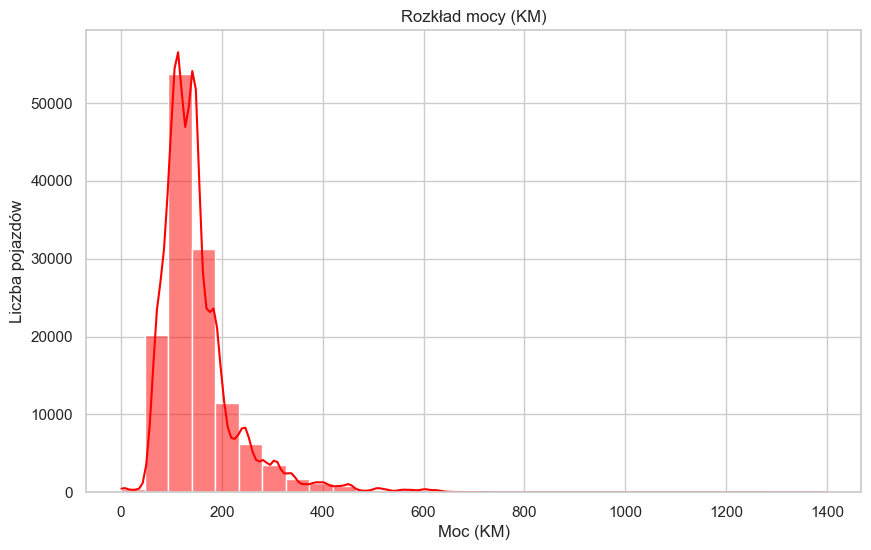

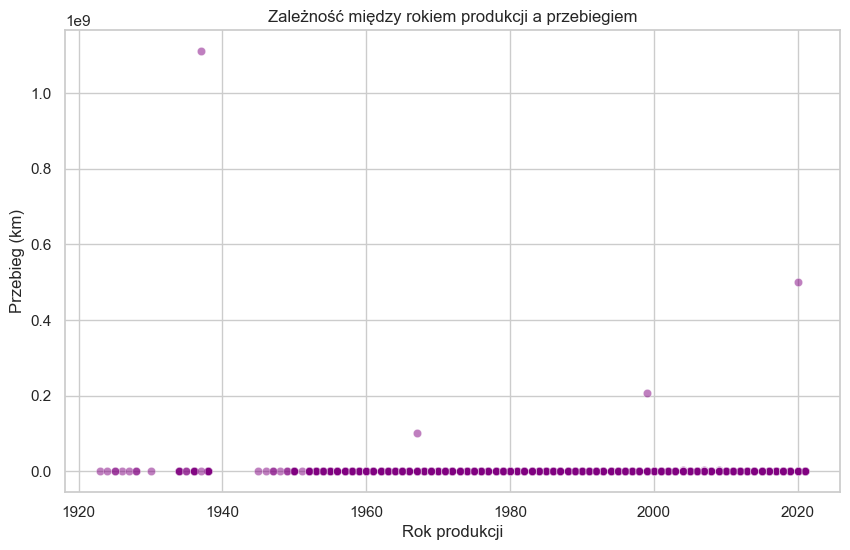

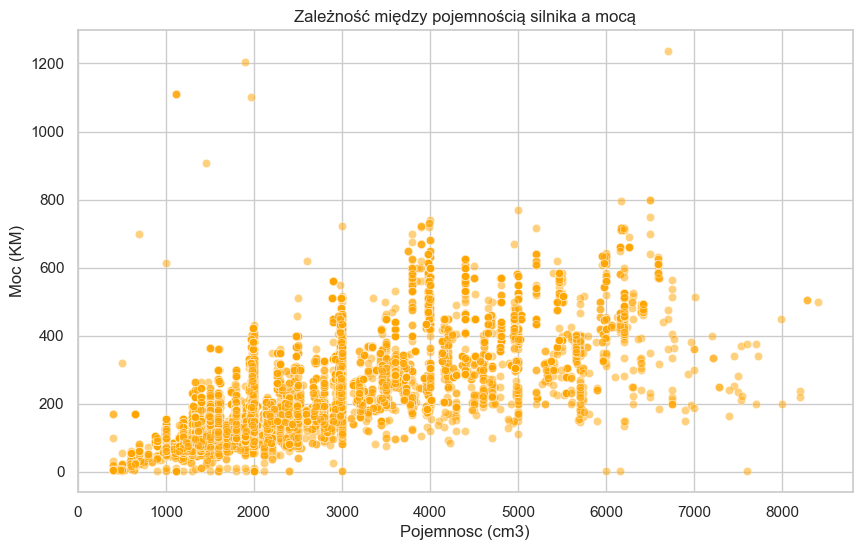

C:\Users\vipcy\AppData\Local\Temp\ipykernel_14128\585860720.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Liczba_drzwi', data=df_train, palette='viridis')


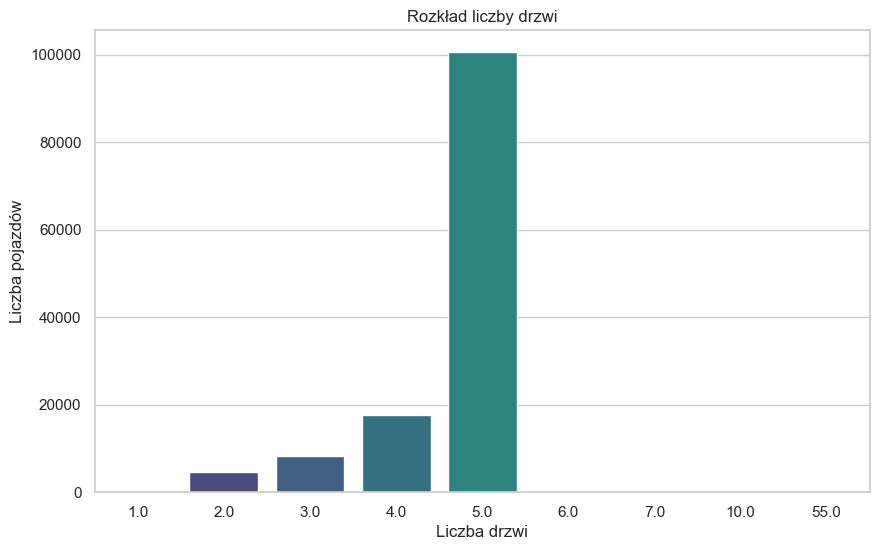

C:\Users\vipcy\AppData\Local\Temp\ipykernel_14128\585860720.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Kolor', data=df_train, palette='viridis', order=df_train['Kolor'].value_counts().index)


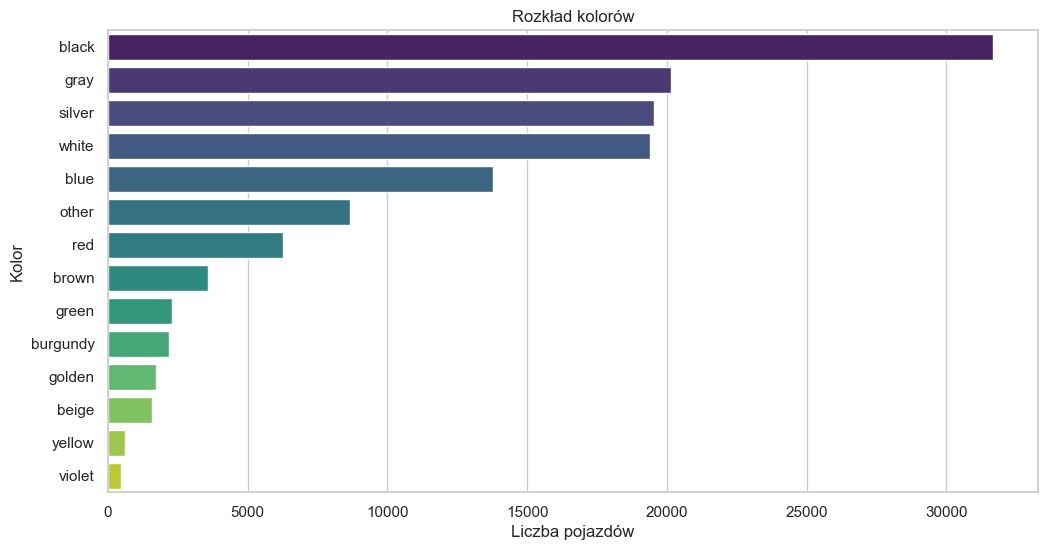

C:\Users\vipcy\AppData\Local\Temp\ipykernel_14128\585860720.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Typ_silnika', y='Moc_KM', data=df_train, palette='viridis')


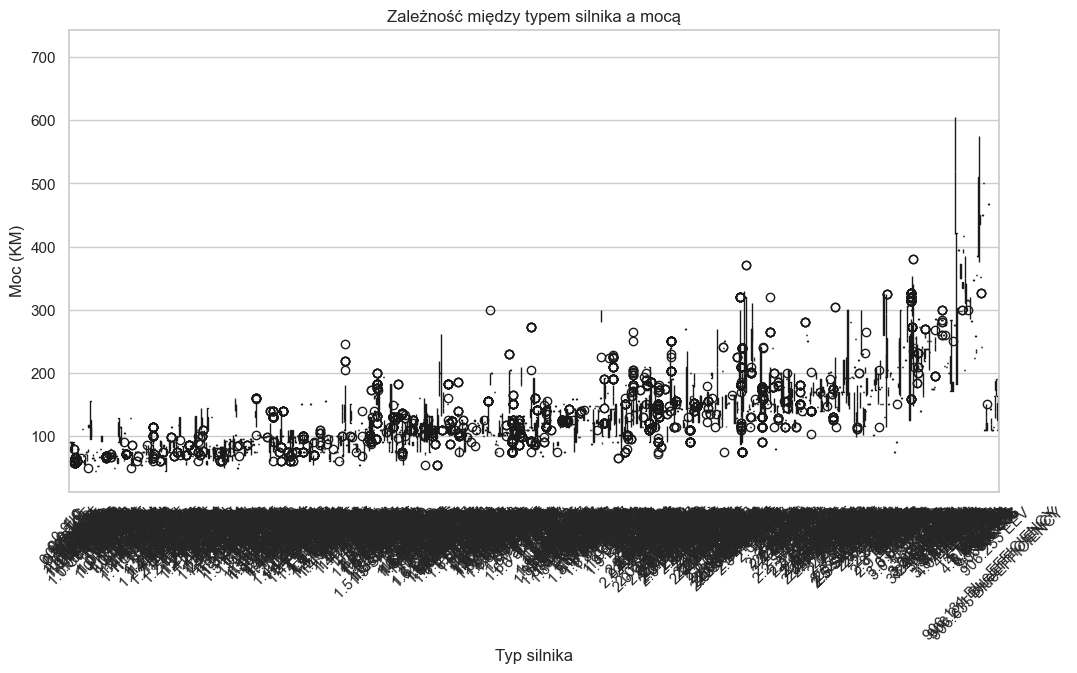

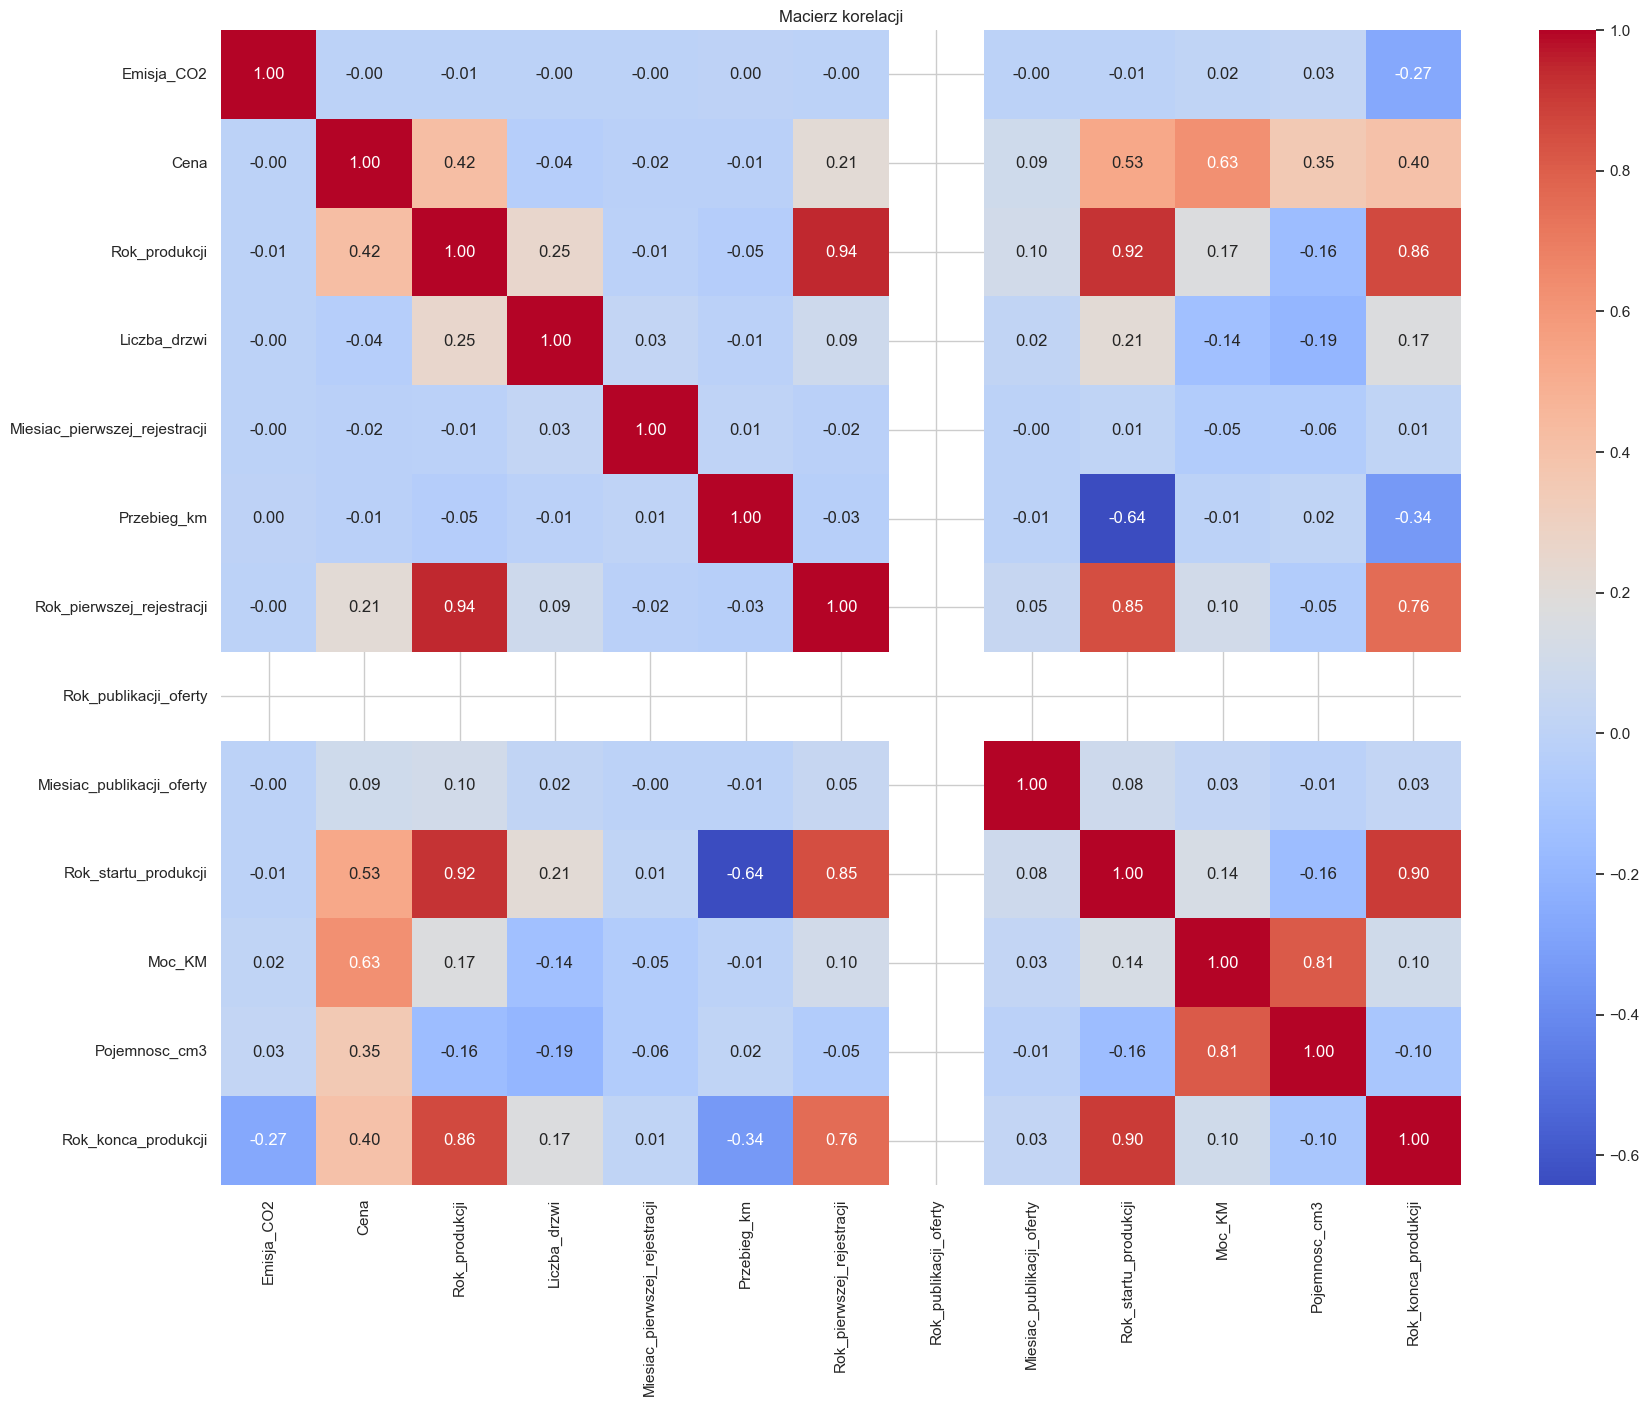

C:\Users\vipcy\AppData\Local\Temp\ipykernel_14128\585860720.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df_train, palette='viridis')


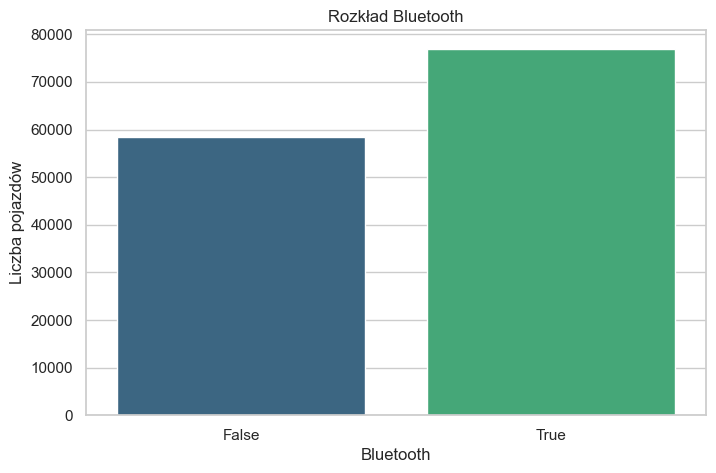

C:\Users\vipcy\AppData\Local\Temp\ipykernel_14128\585860720.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df_train, palette='viridis')


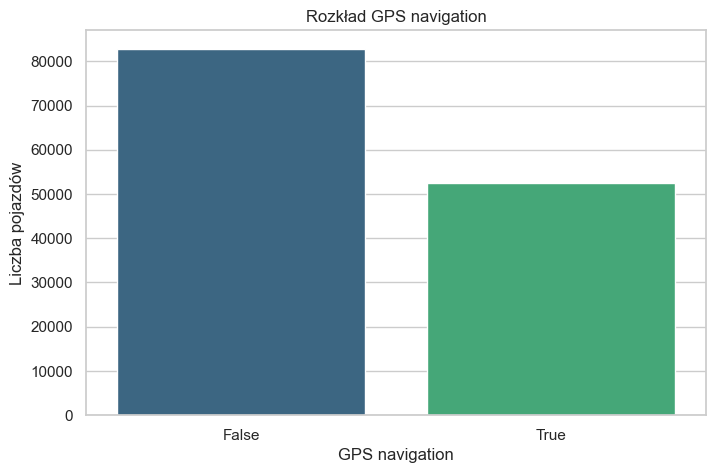

C:\Users\vipcy\AppData\Local\Temp\ipykernel_14128\585860720.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df_train, palette='viridis')


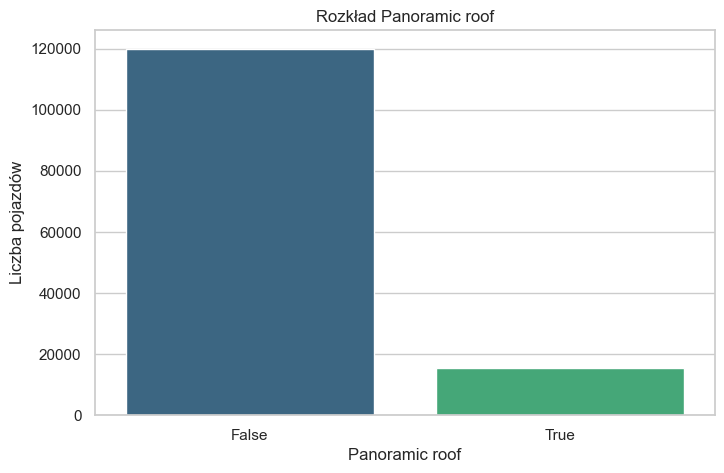

C:\Users\vipcy\AppData\Local\Temp\ipykernel_14128\585860720.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df_train, palette='viridis')


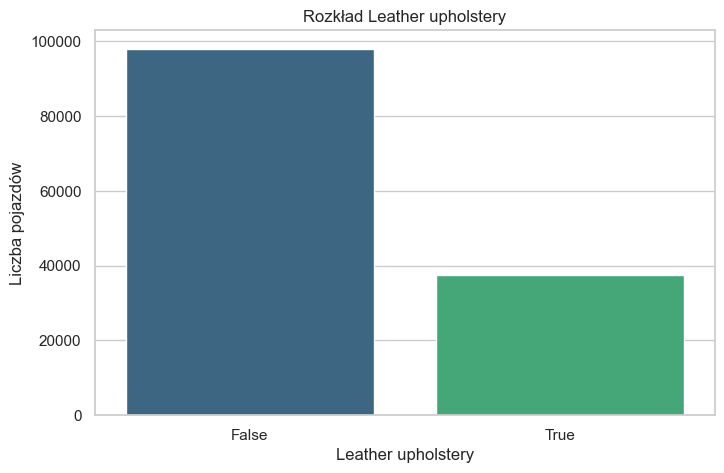

C:\Users\vipcy\AppData\Local\Temp\ipykernel_14128\585860720.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df_train, palette='viridis')


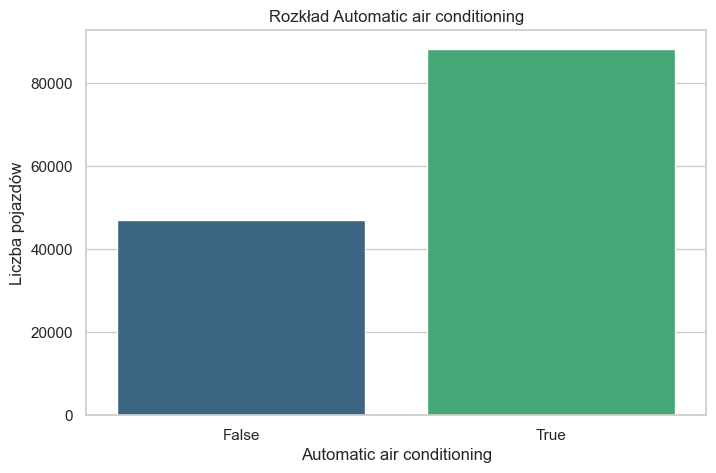

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Załóżmy, że dane są wczytane do DataFrame o nazwie df
# df = pd.read_csv('dane.csv')

# Ustawienie stylu wykresów
sns.set(style="whitegrid")

# 1. Rozkład ceny (jeśli kolumna 'Cena' jest dostępna)
# W tym przypadku kolumna 'Cena' jest pusta, więc pomijamy ten krok

# 2. Rozkład roku produkcji
plt.figure(figsize=(10, 6))
sns.histplot(df_train['Rok_produkcji'], bins=30, kde=True, color='blue')
plt.title('Rozkład roku produkcji')
plt.xlabel('Rok produkcji')
plt.ylabel('Liczba pojazdów')
plt.show()

# 3. Rozkład przebiegu
plt.figure(figsize=(10, 6))
sns.histplot(df_train['Przebieg_km'], bins=30, kde=True, color='green')
plt.title('Rozkład przebiegu (km)')
plt.xlabel('Przebieg (km)')
plt.ylabel('Liczba pojazdów')
plt.show()

# 4. Rozkład mocy (KM)
plt.figure(figsize=(10, 6))
sns.histplot(df_train['Moc_KM'], bins=30, kde=True, color='red')
plt.title('Rozkład mocy (KM)')
plt.xlabel('Moc (KM)')
plt.ylabel('Liczba pojazdów')
plt.show()

# 5. Zależność między rokiem produkcji a przebiegiem
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rok_produkcji', y='Przebieg_km', data=df_train, alpha=0.5, color='purple')
plt.title('Zależność między rokiem produkcji a przebiegiem')
plt.xlabel('Rok produkcji')
plt.ylabel('Przebieg (km)')
plt.show()

# 6. Zależność między mocą a pojemnością silnika
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Pojemnosc_cm3', y='Moc_KM', data=df_train, alpha=0.5, color='orange')
plt.title('Zależność między pojemnością silnika a mocą')
plt.xlabel('Pojemnosc (cm3)')
plt.ylabel('Moc (KM)')
plt.show()

# 7. Rozkład liczby drzwi
plt.figure(figsize=(10, 6))
sns.countplot(x='Liczba_drzwi', data=df_train, palette='viridis')
plt.title('Rozkład liczby drzwi')
plt.xlabel('Liczba drzwi')
plt.ylabel('Liczba pojazdów')
plt.show()

# 8. Rozkład kolorów
plt.figure(figsize=(12, 6))
sns.countplot(y='Kolor', data=df_train, palette='viridis', order=df_train['Kolor'].value_counts().index)
plt.title('Rozkład kolorów')
plt.xlabel('Liczba pojazdów')
plt.ylabel('Kolor')
plt.show()

# 9. Zależność między typem silnika a mocą
plt.figure(figsize=(12, 6))
sns.boxplot(x='Typ_silnika', y='Moc_KM', data=df_train, palette='viridis')
plt.title('Zależność między typem silnika a mocą')
plt.xlabel('Typ silnika')
plt.ylabel('Moc (KM)')
plt.xticks(rotation=45)
plt.show()

# 10. Korelacja między zmiennymi numerycznymi
# Wybieramy tylko numeryczne kolumny
numeric_columns = df_train.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(20, 15))
sns.heatmap(df_train[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Macierz korelacji')
plt.show()

# 11. Rozkład wybranych cech dodatkowych (np. wyposażenie)
features = ['Bluetooth', 'GPS navigation', 'Panoramic roof', 'Leather upholstery', 'Automatic air conditioning']
for feature in features:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=feature, data=df_train, palette='viridis')
    plt.title(f'Rozkład {feature}')
    plt.xlabel(feature)
    plt.ylabel('Liczba pojazdów')
    plt.show()

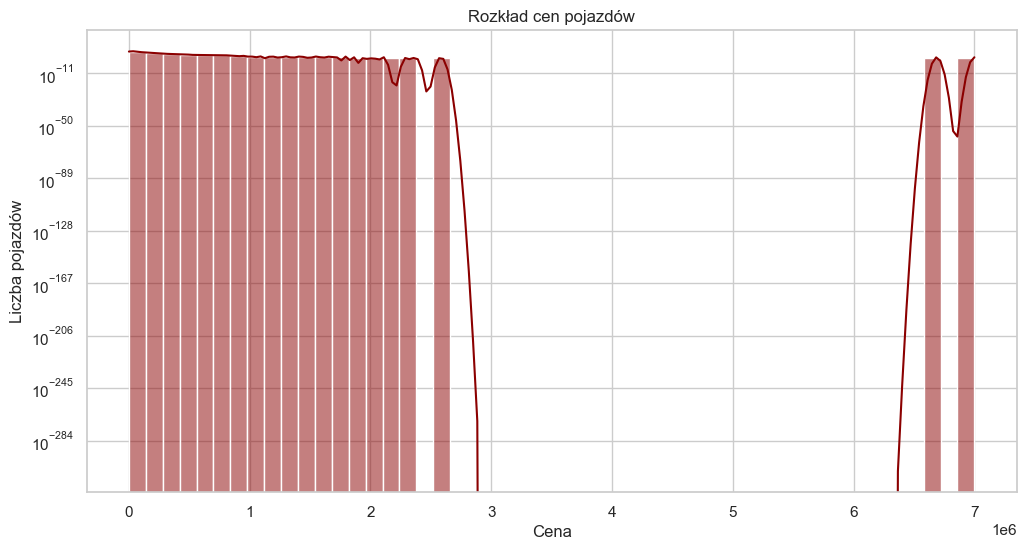

In [30]:
# Przykładowy kod (zakładając, że Cena jest dostępna):
plt.figure(figsize=(12, 6))
sns.histplot(df_train['Cena'], bins=50, kde=True, color='darkred')
plt.title('Rozkład cen pojazdów')
plt.xlabel('Cena')
plt.ylabel('Liczba pojazdów')
plt.yscale('log')  # Jeśli ceny są bardzo skośne
plt.show()

C:\Users\vipcy\AppData\Local\Temp\ipykernel_14128\236994245.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


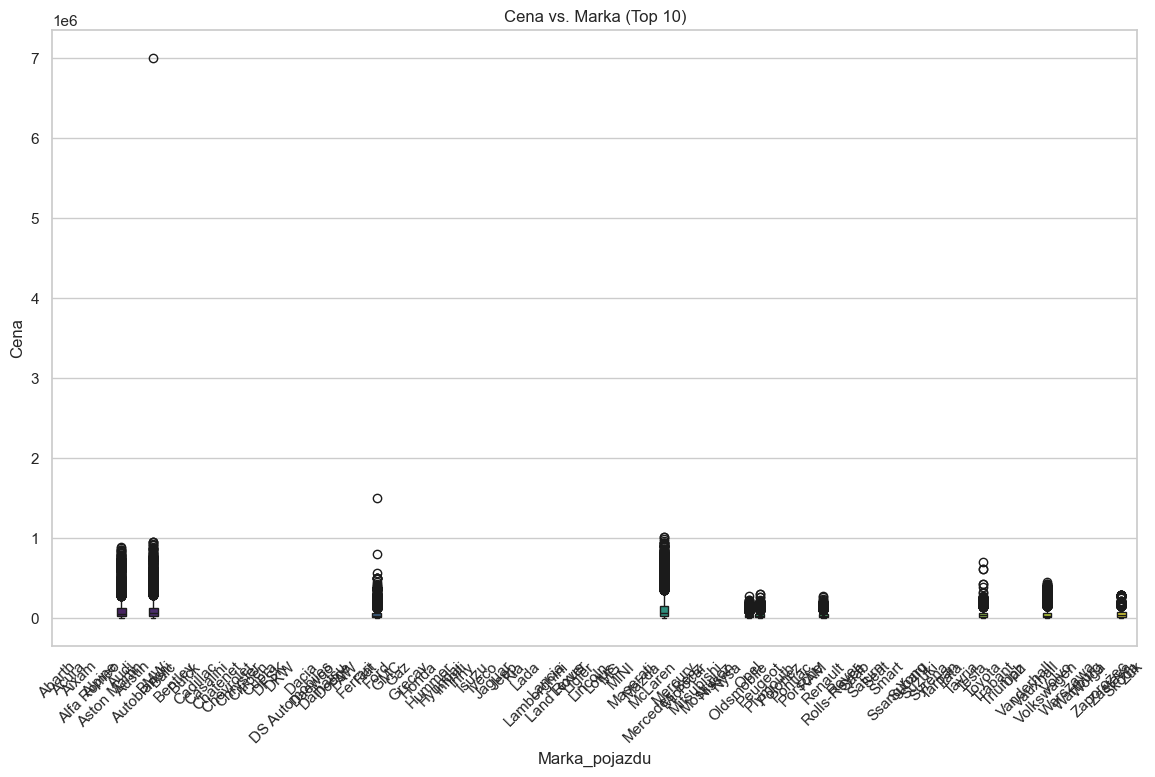

In [31]:
# Top 10 najczęstszych marek
top_marki = df_train['Marka_pojazdu'].value_counts().head(10).index

plt.figure(figsize=(14, 8))
sns.boxplot(
    x='Marka_pojazdu',
    y='Cena',
    data=df_train[df_train['Marka_pojazdu'].isin(top_marki)],
    palette='viridis'
)
plt.title('Cena vs. Marka (Top 10)')
plt.xticks(rotation=45)
plt.show()

C:\Users\vipcy\AppData\Local\Temp\ipykernel_14128\3232128119.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


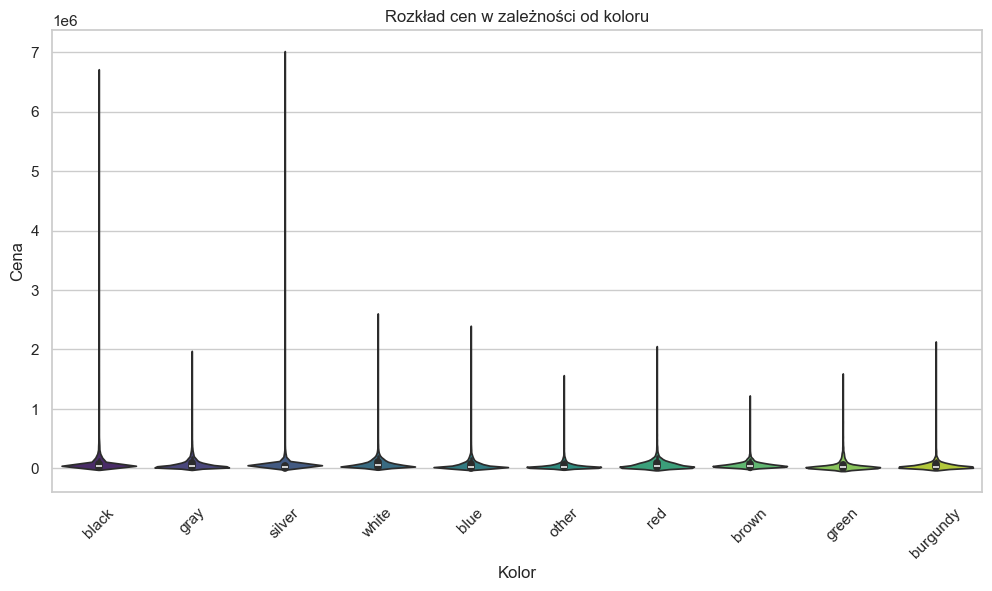

In [32]:
plt.figure(figsize=(12, 6))
sns.violinplot(
    x='Kolor',
    y='Cena',
    data=df_train,
    palette='viridis',
    order=df_train['Kolor'].value_counts().index[:10]  # Top 10 kolorów
)
plt.title('Rozkład cen w zależności od koloru')
plt.xticks(rotation=45)
plt.show()

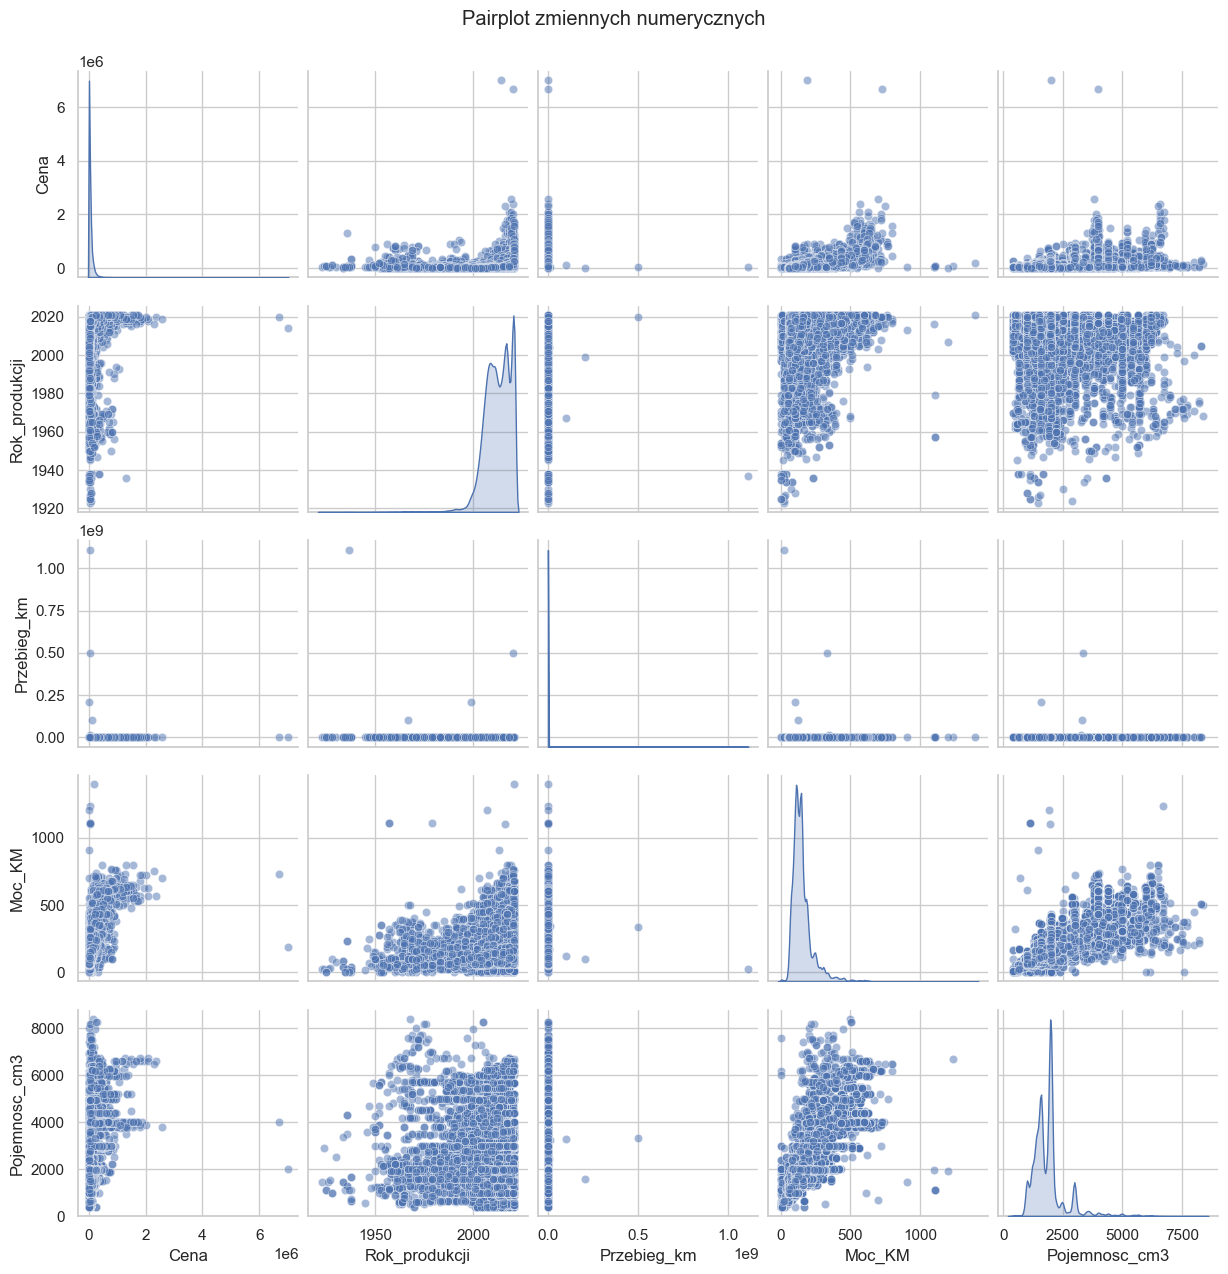

In [33]:
# Pairplot dla kluczowych zmiennych
sns.pairplot(
    df_train[['Cena', 'Rok_produkcji', 'Przebieg_km', 'Moc_KM', 'Pojemnosc_cm3']],
    diag_kind='kde',
    plot_kws={'alpha': 0.5}
)
plt.suptitle('Pairplot zmiennych numerycznych', y=1.02)
plt.show()

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

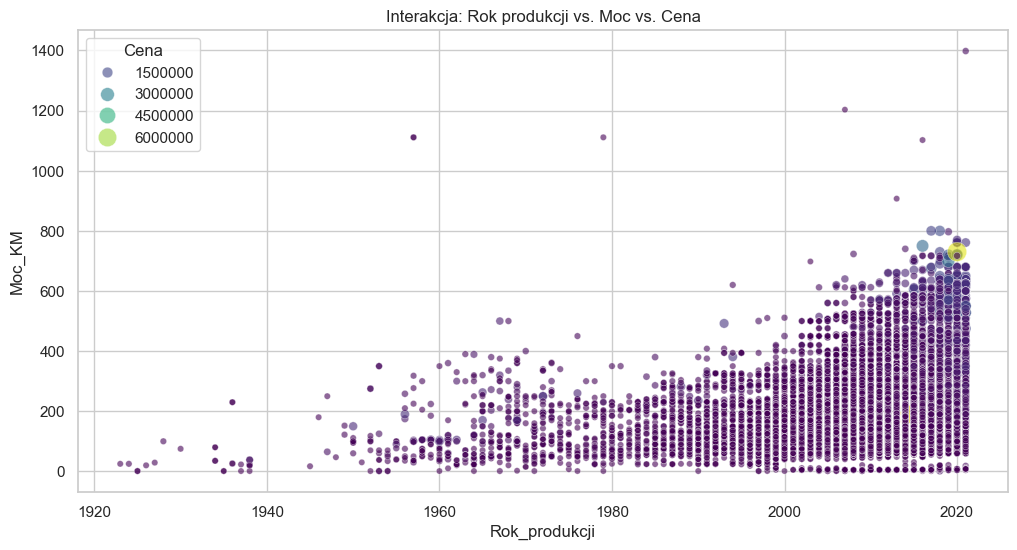

In [34]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x='Rok_produkcji',
    y='Moc_KM',
    hue='Cena',
    data=df_train,
    palette='viridis',
    alpha=0.6,
    size='Cena',
    sizes=(20, 200)
)
plt.title('Interakcja: Rok produkcji vs. Moc vs. Cena')
plt.colorbar(label='Cena')
plt.show()

In [9]:
# Trend cen w czasie (np. czy ceny spadają wraz z wiekiem oferty?)
df_train['Data_publikacji'] = pd.to_datetime(
    df_train['Rok_publikacji_oferty'].astype(str) + '-' + df_train['Miesiac_publikacji_oferty'].astype(str),
    format='%Y-%m'
)

plt.figure(figsize=(14, 6))
sns.lineplot(
    x='Data_publikacji',
    y='Cena',
    data=df_train,
    estimator='median',
    ci=None
)
plt.title('Średnia cena w czasie')
plt.xticks(rotation=45)
plt.show()

0    ['ABS', 'Electric front windows', 'Drivers air...
1    ['ABS', 'Electric front windows', 'Drivers air...
2    ['ABS', 'Electric front windows', 'Passengers ...
3    ['ABS', 'Electric front windows', 'Drivers air...
4    ['ABS', 'Electric front windows', 'Drivers air...
Name: Wyposazenie, dtype: object


In [12]:
# Trend cen w czasie (np. czy ceny spadają wraz z wiekiem oferty?)
df_train['Data_publikacji'] = pd.to_datetime(
    df_train['Rok_publikacji_oferty'].astype(str) + '-' + df_train['Miesiac_publikacji_oferty'].astype(str),
    format='%Y-%m'
)

plt.figure(figsize=(14, 6))
sns.lineplot(
    x='Data_publikacji',
    y='Cena',
    data=df_train,
    estimator='median',
    ci=None
)
plt.title('Średnia cena w czasie')
plt.xticks(rotation=45)
plt.show()

ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'labelfontfamily', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

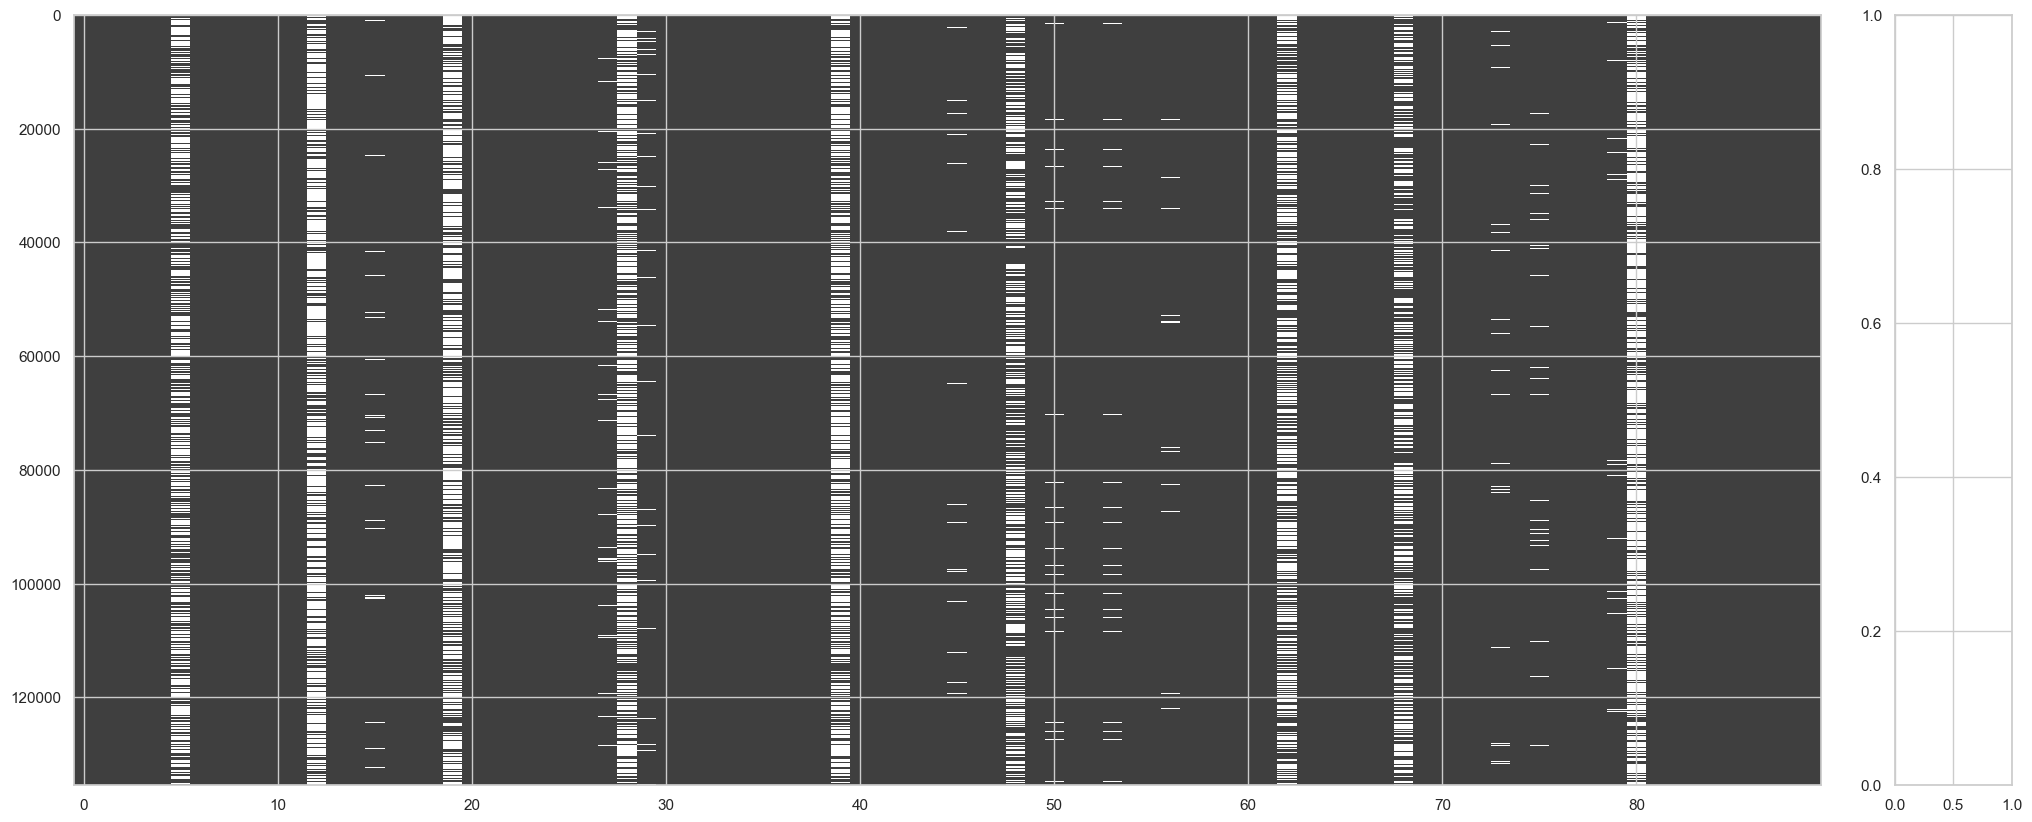

In [35]:
import missingno as msno

msno.matrix(df_train)
plt.title('Macierz brakujących danych')
plt.show()

In [21]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_train[['Przebieg_km', 'Moc_KM', 'Pojemnosc_cm3']],
    orient='h',
    palette='Set2'
)
plt.title('Wykres pudełkowy dla zmiennych numerycznych')
plt.show()

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [20]:
# Przykład: Czy pojazdy z klimatyzacją automatyczną są droższe?
plt.figure(figsize=(10, 6))
sns.pointplot(
    x='Automatic air conditioning',
    y='Cena',
    data=df_train,
    capsize=0.1,
    palette='viridis'
)
plt.title('Cena vs. Klimatyzacja automatyczna')
plt.show()

(135397, 114162)

In [ ]:
# Top 10 województw
top_wojewodztwa = df_train['Wojewodztwo'].value_counts().head(10).index

plt.figure(figsize=(12, 6))
sns.boxplot(
    x='Wojewodztwo',
    y='Cena',
    data=df_train[df_train['Wojewodztwo'].isin(top_wojewodztwa)],
    palette='viridis'
)
plt.title('Cena vs. Województwo (Top 10)')
plt.xticks(rotation=45)
plt.show()

In [48]:
vehicle_types = ['SUV', 'sedan', 'compact', 'station_wagon']
df_vehicle = df_train[vehicle_types].idxmax(axis=1)

plt.figure(figsize=(12, 6))
sns.boxplot(
    x=df_vehicle,
    y=df_train['Cena'],
    palette='viridis',
    order=vehicle_types
)
plt.title('Cena vs. Typ nadwozia')
plt.xlabel('Typ nadwozia')
plt.show()

,ID,Cena,Waluta,Stan,Marka_pojazdu,Model_pojazdu,Wersja_pojazdu,Generacja_pojazdu,Rok_produkcji,Przebieg_km,...,Skrzynia_biegow,Typ_nadwozia,Liczba_drzwi,Kolor,Kraj_pochodzenia,Pierwszy_wlasciciel,Data_pierwszej_rejestracji,Data_publikacji_oferty,Lokalizacja_oferty,Wyposazenie
0,1,13900,PLN,Used,Renault,Grand Espace,Gr 2.0T 16V Expression,NaN,2005.0,213000.0,...,Manual,minivan,5.0,blue,NaN,NaN,NaN,28/04/2021,"SŁONECZNA 1 - 99-300 Kutno, kutnowski, Łódzkie...","['ABS', 'Electric front windows', 'Drivers air..."
1,2,25900,PLN,Used,Renault,Megane,1.6 16V 110,III (2008-2016),2010.0,117089.0,...,Manual,station_wagon,5.0,silver,NaN,NaN,16/06/2010,04/05/2021,"ul. Wiosenna 8 - 41-407 Imielin, Centrum (Polska)","['ABS', 'Electric front windows', 'Drivers air..."
2,3,35900,PLN,Used,Opel,Zafira,Tourer 1.6 CDTI ecoFLEX Start/Stop,C (2011-2019),2015.0,115600.0,...,Manual,minivan,5.0,white,Denmark,NaN,NaN,03/05/2021,"Sianów, koszaliński, Zachodniopomorskie","['ABS', 'Electric front windows', 'Passengers ..."
3,4,5999,PLN,Used,Ford,Focus,1.6 TDCi FX Silver / Silver X,Mk2 (2004-2011),2007.0,218000.0,...,Manual,compact,5.0,blue,NaN,NaN,27/11/2007,02/05/2021,"Gdańsk, Pomorskie, Przymorze Wielkie","['ABS', 'Electric front windows', 'Drivers air..."
4,5,44800,PLN,Used,Toyota,Avensis,1.8,III (2009-),2013.0,NaN,...,Manual,NaN,4.0,other,Poland,Yes,20/05/2013,02/05/2021,"Świdnik, świdnicki, Lubelskie","['ABS', 'Electric front windows', 'Drivers air..."
5,6,126000,PLN,Used,BMW,X5,NaN,F15 (2013-2018),2014.0,168000.0,...,Automatic,SUV,4.0,other,Germany,NaN,11/06/2014,24/04/2021,"Świdwin, świdwiński, Zachodniopomorskie","['ABS', 'Electric front windows', 'Drivers air..."
6,7,114880,PLN,Used,Audi,A6,2.0 TDI ultra S tronic,C7 (2011-2018),2016.0,NaN,...,Automatic,sedan,4.0,black,Germany,Yes,30/09/2016,30/04/2021,Ul. Buforowa 125 / Hala nr 23A - 52-131 Wrocła...,"['ABS', 'Electric front windows', 'Drivers air..."
7,8,11900,PLN,Used,Renault,Scenic,1.5 dCi Authentique,III (2009-2013),2011.0,414273.0,...,Manual,minivan,5.0,white,NaN,NaN,22/06/2011,NaN,"Serby, głogowski, Dolnośląskie","['ABS', 'Electric front windows', 'Drivers air..."
8,9,15900,PLN,Used,Ford,Focus,NaN,Mk2 (2004-2011),2009.0,204000.0,...,Manual,station_wagon,5.0,black,Germany,NaN,NaN,02/05/2021,"Olsztyn, Warmińsko-mazurskie","['ABS', 'Alloy wheels', 'Central locking', 'El..."
9,10,38900,PLN,Used,Audi,A4,2.0 TDI,B8 (2007-2015),2011.0,235000.0,...,Manual,sedan,4.0,blue,NaN,NaN,NaN,01/05/2021,"Gózd, radomski, Mazowieckie","['Electric front windows', 'Drivers airbag', '..."


In [ ]:
vehicle_types = ['SUV', 'sedan', 'compact', 'station_wagon']
df_vehicle = df_train[vehicle_types].idxmax(axis=1)

plt.figure(figsize=(12, 6))
sns.boxplot(
    x=df_vehicle,
    y=df_train['Cena'],
    palette='viridis',
    order=vehicle_types
)
plt.title('Cena vs. Typ nadwozia')
plt.xlabel('Typ nadwozia')
plt.show()

In [46]:
df_test["Wyposazenie"].str.contains("ABS")

Wyposazenie
True     89
False     9
Name: count, dtype: int64